# Data processing
Object-oriented version of this.
### Flood fraction
Steps to add new regions:
1. Download vector flood maps from [Copernicus EMS](https://emergency.copernicus.eu/mapping/list-of-activations-rapid)
2. Manually define subregions corresponding to those displayed on EMS using [geojson.io](geojson.io)
3. Add the geoJSON feature collection to event_geojsons.csv
4. Add the storm start and dissipation dates to event_dates.csv
5. Download IBTrACs data -- done


#### Final data formats
64x64 gridcells images representing 500 sqm each and total 32 sqkm.
#### Left to do:
- [x] Better merging of topography and bathymetry data
- [x] Better unmasking of JRC permanent water layer
- [ ] Change recalculate to be function specific
- [ ] What to do when no pressure drop in wind field?
- [ ] Pandas index warning
- [ ] Slope to permanent water
- [ ] Wind field methods review dimensions
- [ ] ESL heights from reanalysis data

In [1]:
from os.path import join, exists
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, shape
from ast import literal_eval

from data_utils import *
from model_utils import *

import ee
import geemap
from shapely.ops import nearest_points
from event import Event

Setting up storm Roanu Event instance for Barguna.
subregion 0 area: 1024.0 sqkm
subregion 1 area: 1024.0 sqkm
subregion 2 area: 1024.0 sqkm
Processing subregion 0

Looking for ../data/indata_new/roanu_barguna/feature_stats_0_0.shp
Loaded existing shapefile ../data/indata_new/roanu_barguna/feature_stats_0_0.shp...



/Users/alisonpeard/miniconda3/envs/hybridmodels/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Processing subregion 1

Looking for ../data/indata_new/roanu_barguna/feature_stats_1_0.shp
Loaded existing shapefile ../data/indata_new/roanu_barguna/feature_stats_1_0.shp...



/Users/alisonpeard/miniconda3/envs/hybridmodels/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Processing subregion 2

Looking for ../data/indata_new/roanu_barguna/feature_stats_2_0.shp
Loaded existing shapefile ../data/indata_new/roanu_barguna/feature_stats_2_0.shp...



/Users/alisonpeard/Documents/DPhil/hybridmodels/python/event.py:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(10, 5))
/Users/alisonpeard/miniconda3/envs/hybridmodels/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


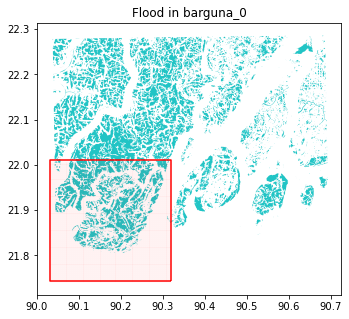

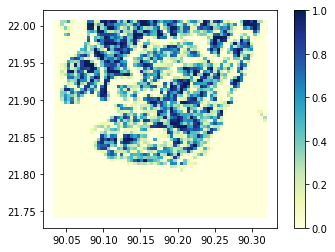

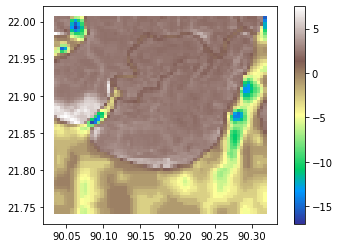

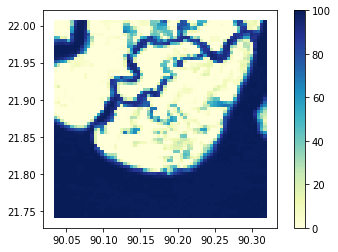

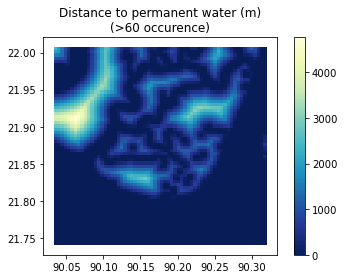

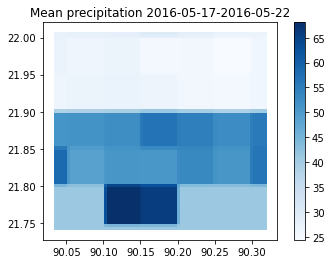

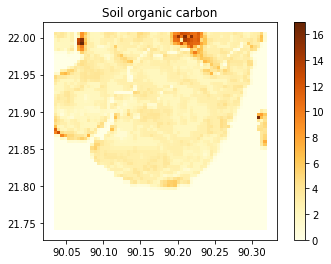

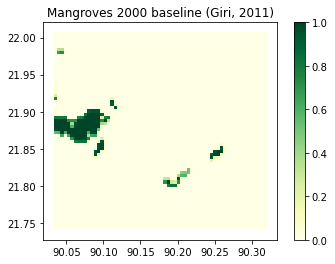

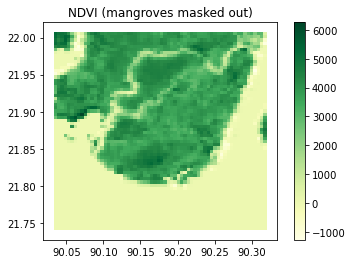

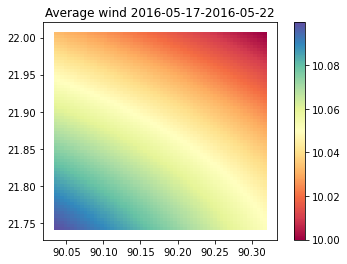

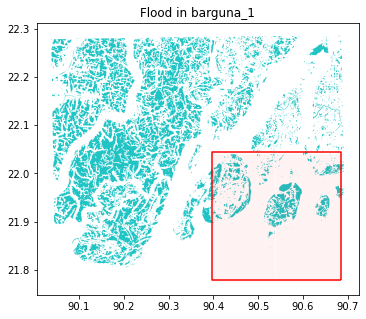

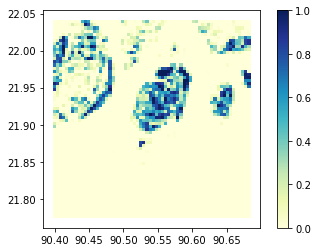

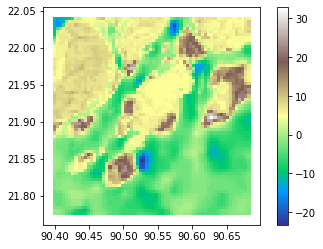

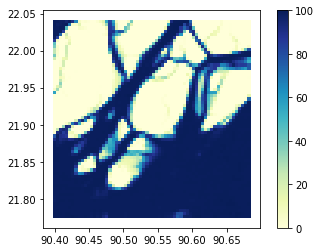

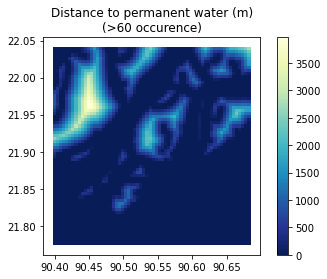

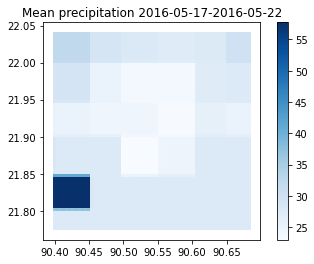

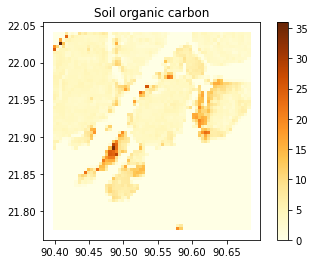

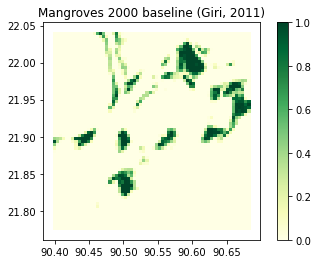

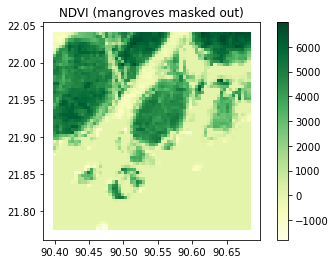

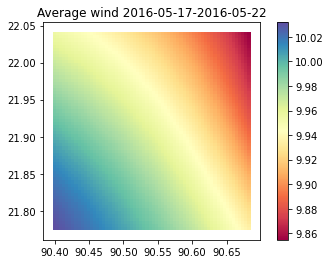

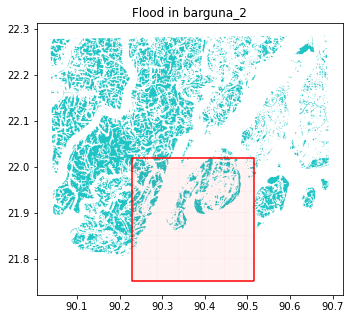

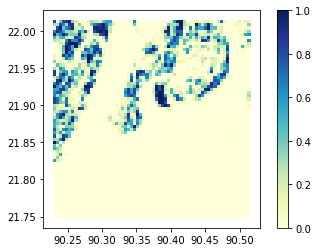

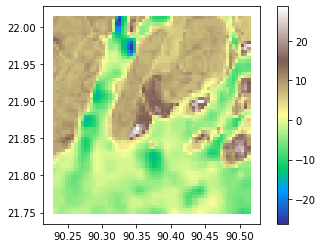

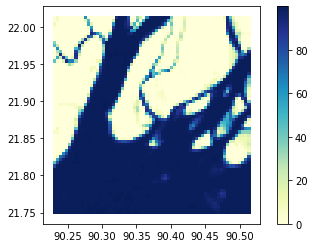

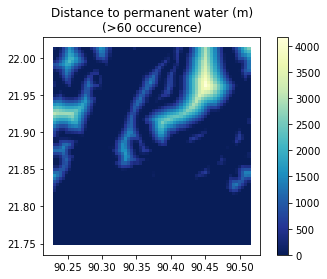

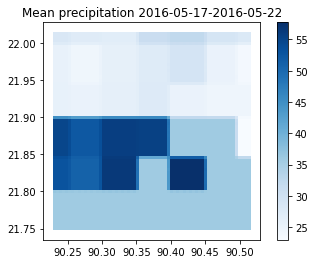

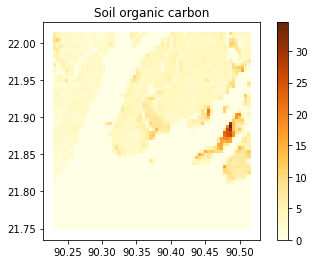

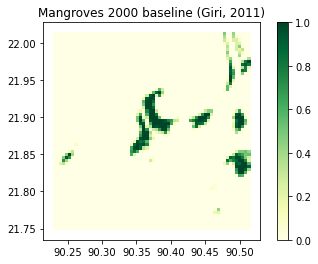

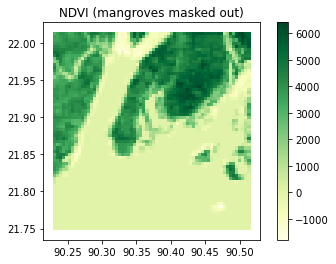

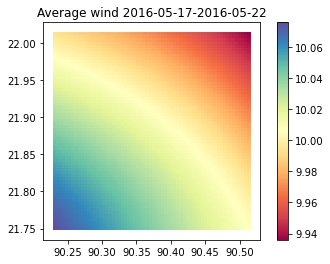

In [2]:
storm = Event("roanu", "barguna", nsubregions=3, recalculate=False)
storm.process_all_subregions()

## Final output

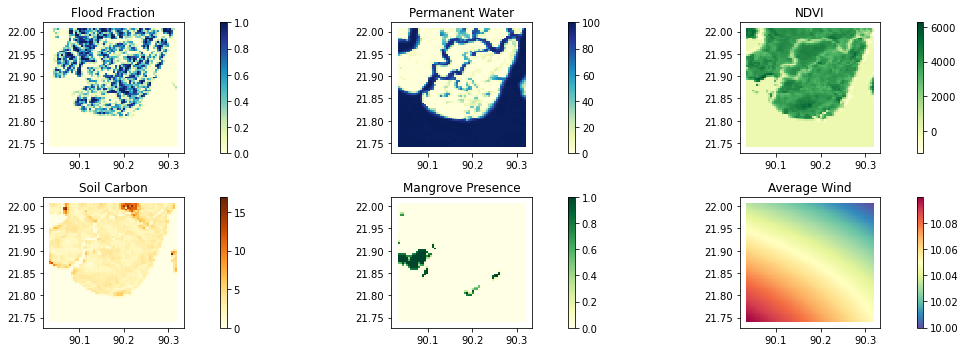

In [36]:
feature_gdf = storm.feature_gdf[0]
fig, ax = plt.subplots(2,3, figsize=(20, 5), layout="tight")

feature_gdf.plot(column="floodfrac", ax=ax[0, 0], cmap="YlGnBu", legend=True)
ax[0, 0].set_title("Flood Fraction")

feature_gdf.plot(column="jrc_permwa", ax=ax[0, 1], cmap="YlGnBu", legend=True)
ax[0, 1].set_title("Permanent Water")

feature_gdf.plot(column="ndvi", ax=ax[0, 2], cmap="YlGn", legend=True)
ax[0, 2].set_title("NDVI")

feature_gdf.plot(column="soilcarbon", ax=ax[1, 0], cmap="YlOrBr", legend=True)
ax[1, 0].set_title("Soil Carbon")

feature_gdf.plot(column="mangrove", ax=ax[1, 1], cmap="YlGn", vmin=0, legend=True)
ax[1, 1].set_title("Mangrove Presence")

feature_gdf.plot(column="wind_avg", ax=ax[1, 2], cmap="Spectral_r", legend=True)
ax[1, 2].set_title("Average Wind");

!say done

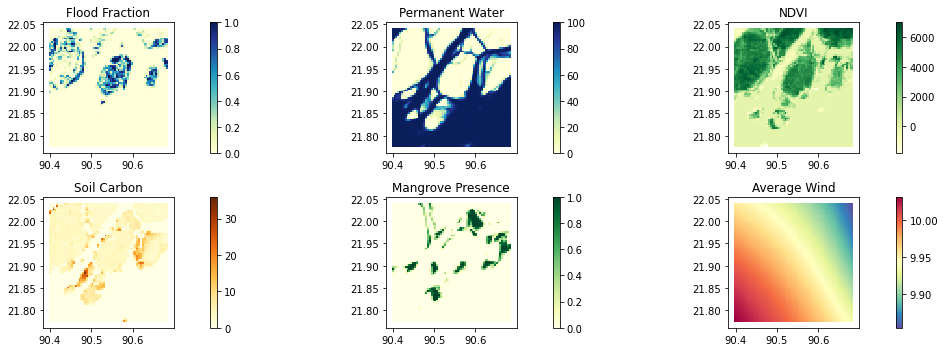

In [37]:
feature_gdf = storm.feature_gdf[1]
fig, ax = plt.subplots(2,3, figsize=(20, 5), layout="tight")

feature_gdf.plot(column="floodfrac", ax=ax[0, 0], cmap="YlGnBu", legend=True)
ax[0, 0].set_title("Flood Fraction")

feature_gdf.plot(column="jrc_permwa", ax=ax[0, 1], cmap="YlGnBu", legend=True)
ax[0, 1].set_title("Permanent Water")

feature_gdf.plot(column="ndvi", ax=ax[0, 2], cmap="YlGn", legend=True)
ax[0, 2].set_title("NDVI")

feature_gdf.plot(column="soilcarbon", ax=ax[1, 0], cmap="YlOrBr", legend=True)
ax[1, 0].set_title("Soil Carbon")

feature_gdf.plot(column="mangrove", ax=ax[1, 1], cmap="YlGn", vmin=0, legend=True)
ax[1, 1].set_title("Mangrove Presence")

feature_gdf.plot(column="wind_avg", ax=ax[1, 2], cmap="Spectral_r", legend=True)
ax[1, 2].set_title("Average Wind");

!say done

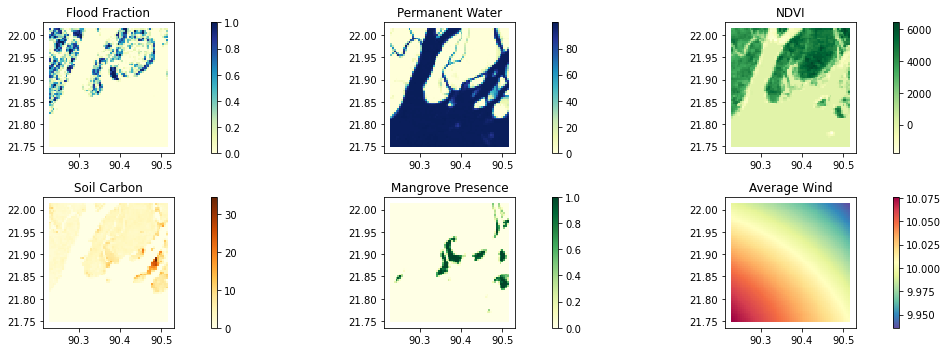

In [38]:
# plot without masks
feature_gdf = storm.feature_gdf[2]
fig, ax = plt.subplots(2,3, figsize=(20, 5), layout="tight")

feature_gdf.plot(column="floodfrac", ax=ax[0, 0], cmap="YlGnBu", legend=True)
ax[0, 0].set_title("Flood Fraction")

feature_gdf.plot(column="jrc_permwa", ax=ax[0, 1], cmap="YlGnBu", legend=True)
ax[0, 1].set_title("Permanent Water")

feature_gdf.plot(column="ndvi", ax=ax[0, 2], cmap="YlGn", legend=True)
ax[0, 2].set_title("NDVI")

feature_gdf.plot(column="soilcarbon", ax=ax[1, 0], cmap="YlOrBr", legend=True)
ax[1, 0].set_title("Soil Carbon")

feature_gdf.plot(column="mangrove", ax=ax[1, 1], cmap="YlGn", vmin=0, legend=True)
ax[1, 1].set_title("Mangrove Presence")

feature_gdf.plot(column="wind_avg", ax=ax[1, 2], cmap="Spectral_r", legend=True)
ax[1, 2].set_title("Average Wind");

!say done